# Regresion Basica: Predecir eficiencia de gasolina

Este libro usa el set de datos clasico [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) y construye un modelo para predecir el consumo de vehiculos de 1970 y 1980. Para hacer esto proveeremos el modelo con una descripcion de muchos automoviles de ese periodo. Esta descripcion incluye atributos como: Cilindros, desplazamiento, potencia y peso.

El objetivo de este ejercicio es predecir el target miles per galon (MPG), que vendría a representar las millas por galón de combustible.

Este ejemplo usa el API `tf.keras` , revise [Esta Guia](https://www.tensorflow.org/guide/keras) para obtener mas detalles.

In [53]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.16.2


In [54]:
import numpy as np

## El set de Datos de MPG

El set de datos esta disponible de el siguiente repositorio [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/).

### Obtenga los datos
Primero descargue el set de datos.

In [55]:
dataset_path = keras.utils.get_file("auto-mpg.data",
                                    "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/Users/aidamarquez/.keras/datasets/auto-mpg.data'

Importelo usando pandas.

In [56]:
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']

In [57]:
print(type(dataset_path))  # Debería ser <class 'str'>


<class 'str'>


In [58]:
with open(dataset_path, "r") as f:
    for _ in range(5):  # Lee las primeras 5 líneas
        print(f.readline())


18.0   8   307.0      130.0      3504.      12.0   70  1	"chevrolet chevelle malibu"

15.0   8   350.0      165.0      3693.      11.5   70  1	"buick skylark 320"

18.0   8   318.0      150.0      3436.      11.0   70  1	"plymouth satellite"

16.0   8   304.0      150.0      3433.      12.0   70  1	"amc rebel sst"

17.0   8   302.0      140.0      3449.      10.5   70  1	"ford torino"



In [59]:
import os
print(os.path.exists(dataset_path))


True


In [60]:
print(column_names, type(column_names))


['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name'] <class 'list'>


In [61]:
print("column_names:", column_names)
print("Tipo de column_names:", type(column_names))
for i, col in enumerate(column_names):
    print(f"Elemento {i}: {col} - tipo: {type(col)}")


column_names: ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']
Tipo de column_names: <class 'list'>
Elemento 0: MPG - tipo: <class 'str'>
Elemento 1: Cylinders - tipo: <class 'str'>
Elemento 2: Displacement - tipo: <class 'str'>
Elemento 3: Horsepower - tipo: <class 'str'>
Elemento 4: Weight - tipo: <class 'str'>
Elemento 5: Acceleration - tipo: <class 'str'>
Elemento 6: Model Year - tipo: <class 'str'>
Elemento 7: Origin - tipo: <class 'str'>
Elemento 8: Car Name - tipo: <class 'str'>


In [62]:
if isinstance(column_names, (list, tuple)):
    # Ya es lista o tupla
    column_names = [str(x) for x in column_names]
else:
    # Intentar convertir a lista usando tolist() si es un array
    try:
        column_names = column_names.tolist()
        column_names = [str(x) for x in column_names]
    except Exception as e:
        print("Error al convertir column_names:", e)


In [63]:
columns_index = pd.Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name'],dtype="object")
columns_index

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Origin', 'Car Name'],
      dtype='object')

In [64]:
print("Tipo de data:", type(data))
print("Longitud de data:", len(data))
print("Ejemplo de data:", data[:5])  # Muestra las primeras 5 filas
print("Tipo de cada fila:", [type(row) for row in data])


Tipo de data: <class 'list'>
Longitud de data: 398
Ejemplo de data: [['18.0', '8', '307.0', '130.0', '3504.', '12.0', '70', '1', 'chevrolet chevelle malibu'], ['15.0', '8', '350.0', '165.0', '3693.', '11.5', '70', '1', 'buick skylark 320'], ['18.0', '8', '318.0', '150.0', '3436.', '11.0', '70', '1', 'plymouth satellite'], ['16.0', '8', '304.0', '150.0', '3433.', '12.0', '70', '1', 'amc rebel sst'], ['17.0', '8', '302.0', '140.0', '3449.', '10.5', '70', '1', 'ford torino']]
Tipo de cada fila: [<class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class

In [65]:
import numpy as np
print(np.__version__)


1.24.3


In [67]:


# Leer el archivo línea por línea y construir data (lista de listas)
data = []
with open(dataset_path, "r") as file:
    for line in file:
        line = line.strip()
        if not line:
            continue
        parts = line.split()
        if len(parts) < 8:
            continue
        row = parts[:8]
        car_name = " ".join(parts[8:]).replace('"', '')
        data.append(row + [car_name])

# Función recursiva para forzar que cada elemento sea un escalar o cadena
def to_scalar(x):
    if isinstance(x, np.ndarray):
        # Si es un array con un solo elemento, extraerlo
        if x.size == 1:
            return to_scalar(x.item())
        else:
            # Si tiene varios elementos, convertirlo a lista y luego a cadena
            return str(x.tolist())
    elif isinstance(x, (list, tuple)):
        return type(x)(to_scalar(item) for item in x)
    else:
        return x

# Aplicar la función a cada elemento en cada fila
clean_data = [[to_scalar(item) for item in row] for row in data]

# Verificar la primera fila y sus tipos
print("Primera fila:", clean_data[0])
print("Tipos en la primera fila:", [type(x) for x in clean_data[0]])

# Crear el DataFrame usando la data saneada
raw_dataset = pd.DataFrame(clean_data, columns=column_names)

# Convertir 'Horsepower' a numérico (si es posible)
raw_dataset["Horsepower"] = pd.to_numeric(raw_dataset["Horsepower"], errors="coerce")

# Mostrar las primeras filas
print(raw_dataset.head())


Primera fila: ['18.0', '8', '307.0', '130.0', '3504.', '12.0', '70', '1', 'chevrolet chevelle malibu']
Tipos en la primera fila: [<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>]
    MPG Cylinders Displacement  Horsepower Weight Acceleration Model Year  \
0  18.0         8        307.0       130.0  3504.         12.0         70   
1  15.0         8        350.0       165.0  3693.         11.5         70   
2  18.0         8        318.0       150.0  3436.         11.0         70   
3  16.0         8        304.0       150.0  3433.         12.0         70   
4  17.0         8        302.0       140.0  3449.         10.5         70   

  Origin                   Car Name  
0      1  chevrolet chevelle malibu  
1      1          buick skylark 320  
2      1         plymouth satellite  
3      1              amc rebel sst  
4      1                ford torino  


In [68]:
dataset = raw_dataset.copy()

In [69]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    object 
 1   Cylinders     398 non-null    object 
 2   Displacement  398 non-null    object 
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    object 
 5   Acceleration  398 non-null    object 
 6   Model Year    398 non-null    object 
 7   Origin        398 non-null    object 
 8   Car Name      398 non-null    object 
dtypes: float64(1), object(8)
memory usage: 28.1+ KB


In [70]:
dataset.describe(include='all')

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
count,398,398,398,392.000000,398,398,398,398,398
unique,129,5,82,NaN,351,96,13,3,305
top,13.0,4,97.00,NaN,1985.,14.5,73,1,ford pinto
freq,20,204,21,NaN,4,23,40,249,6
mean,NaN,NaN,NaN,104.469388,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,38.491160,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,46.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,75.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,93.500000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,126.000000,NaN,NaN,NaN,NaN,NaN


### Limpia los datos

Trata los missings y variables categóricas

In [71]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
Car Name        0
dtype: int64

In [72]:
dataset = dataset[dataset['Horsepower']!='?']
dataset['Horsepower'] = dataset['Horsepower'].astype(float)

In [73]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    object 
 1   Cylinders     398 non-null    object 
 2   Displacement  398 non-null    object 
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    object 
 5   Acceleration  398 non-null    object 
 6   Model Year    398 non-null    object 
 7   Origin        398 non-null    object 
 8   Car Name      398 non-null    object 
dtypes: float64(1), object(8)
memory usage: 28.1+ KB


In [103]:
cols_to_convert = ['MPG', 'Cylinders', 'Displacement', 'Weight', 'Acceleration', 'Model Year']

for col in cols_to_convert:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')

print(dataset.dtypes)


MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
USA               int64
Europe            int64
Japan             int64
dtype: object


In [74]:
dataset.drop(['Car Name'], inplace=True, axis=1)

In [75]:
np.unique(dataset['Origin'])

array(['1', '2', '3'], dtype=object)

In [76]:
raw_dataset.groupby('Origin')['Car Name'].describe()

,count,unique,top,freq
Origin,,,,
1,249,187,ford pinto,6
2,70,58,peugeot 504,4
3,79,60,toyota corolla,5


In [77]:
# se puede hacer con get_dummies
origin = dataset.pop('Origin')

dataset['USA'] = (origin == 1)*1
dataset['Europe'] = (origin == 2)*1
dataset['Japan'] = (origin == 3)*1

In [104]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,0


### Divide los datos en train y test

Ahora divida el set de datos en un set de entrenamiento y otro de pruebas. 80% para entrenamiento

Usaremos el set de pruebas en la evaluacion final de nuestro modelo.

NOTA: El resultado tienen que ser dos datasets

In [105]:
train_dataset = dataset.sample(frac=0.8, random_state = 0)
test_dataset = dataset.drop(train_dataset.index)

### Inspecciona los datos

Revise rapidamente la distribucion conjunta del dataset de entrenamiento mediante un grid de gráficos

In [106]:
train_dataset.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'USA', 'Europe', 'Japan'],
      dtype='object')

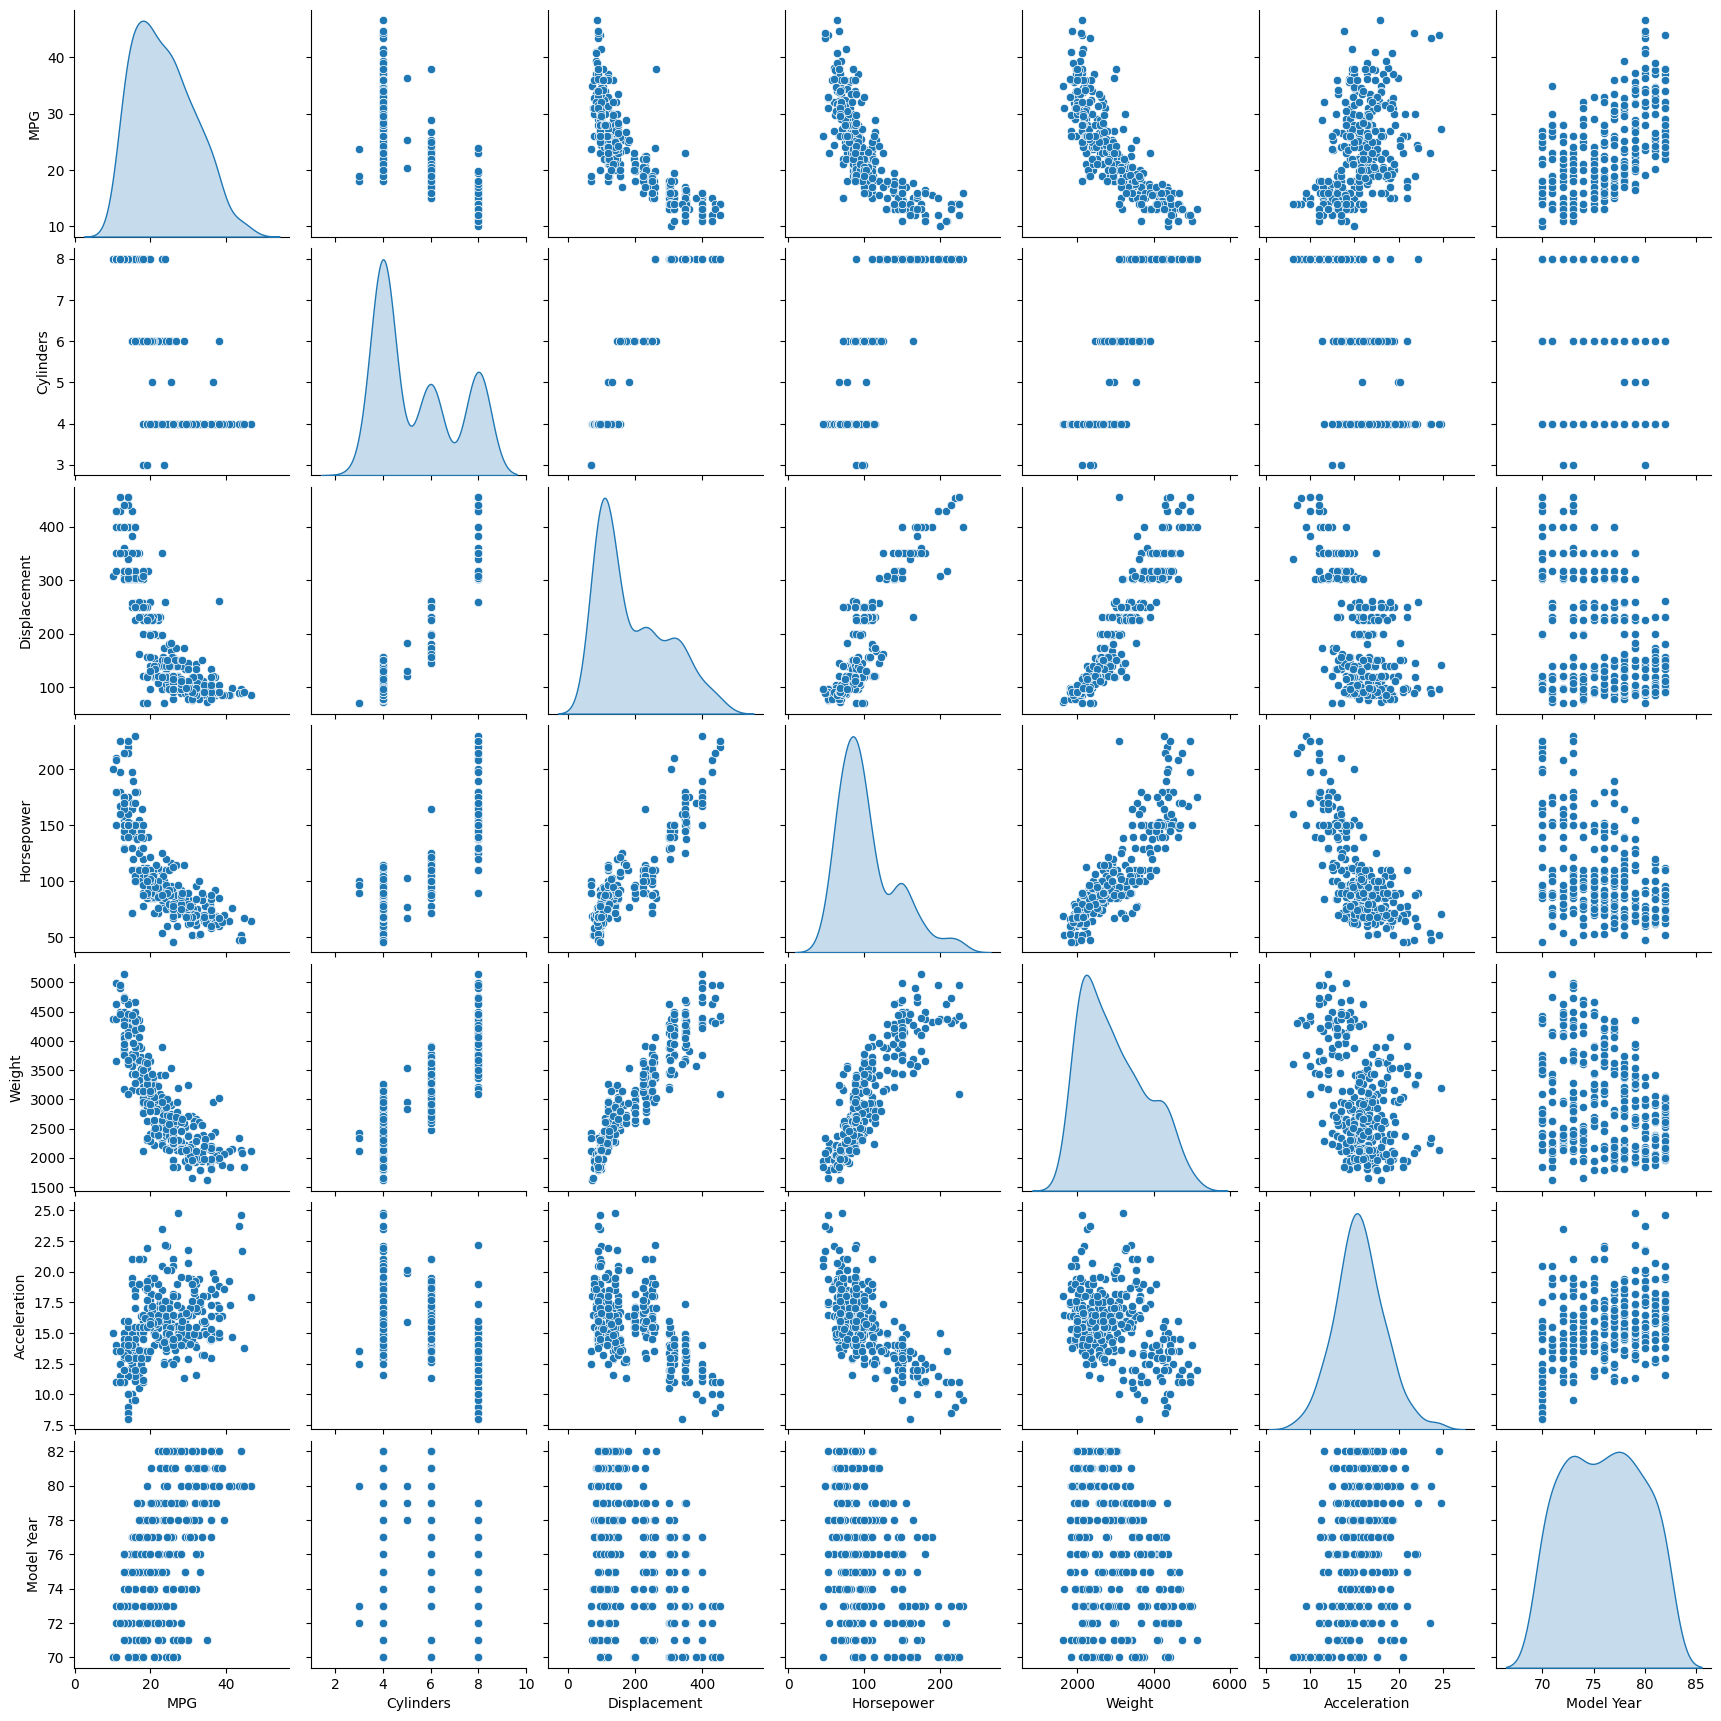

In [107]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year']], diag_kind = 'kde')

Tambien revise las estadisticas generales:

In [108]:
train_dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
count,318.000000,318.000000,318.000000,313.000000,318.000000,318.000000,318.000000,318.0,318.0,318.0
mean,23.590566,5.427673,193.061321,104.067093,2963.823899,15.595912,75.946541,0.0,0.0,0.0
std,7.913617,1.682941,103.812742,38.674662,844.749805,2.796282,3.705266,0.0,0.0,0.0
min,10.000000,3.000000,70.000000,46.000000,1613.000000,8.000000,70.000000,0.0,0.0,0.0
25%,17.125000,4.000000,100.250000,75.000000,2219.250000,13.900000,73.000000,0.0,0.0,0.0
50%,22.750000,4.000000,151.000000,92.000000,2792.500000,15.500000,76.000000,0.0,0.0,0.0
75%,29.000000,6.000000,259.500000,120.000000,3571.250000,17.300000,79.000000,0.0,0.0,0.0
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,0.0,0.0,0.0


In [109]:
train_dataset["MPG"] = pd.to_numeric(train_dataset["MPG"], errors="coerce")




In [110]:
train_dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
count,318.000000,318.000000,318.000000,313.000000,318.000000,318.000000,318.000000,318.0,318.0,318.0
mean,23.590566,5.427673,193.061321,104.067093,2963.823899,15.595912,75.946541,0.0,0.0,0.0
std,7.913617,1.682941,103.812742,38.674662,844.749805,2.796282,3.705266,0.0,0.0,0.0
min,10.000000,3.000000,70.000000,46.000000,1613.000000,8.000000,70.000000,0.0,0.0,0.0
25%,17.125000,4.000000,100.250000,75.000000,2219.250000,13.900000,73.000000,0.0,0.0,0.0
50%,22.750000,4.000000,151.000000,92.000000,2792.500000,15.500000,76.000000,0.0,0.0,0.0
75%,29.000000,6.000000,259.500000,120.000000,3571.250000,17.300000,79.000000,0.0,0.0,0.0
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,0.0,0.0,0.0


In [111]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.T
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,318.0,5.427673,1.682941,3.0,4.00,4.0,6.00,8.0
Displacement,318.0,193.061321,103.812742,70.0,100.25,151.0,259.50,455.0
Horsepower,313.0,104.067093,38.674662,46.0,75.00,92.0,120.00,230.0
Weight,318.0,2963.823899,844.749805,1613.0,2219.25,2792.5,3571.25,5140.0
Acceleration,318.0,15.595912,2.796282,8.0,13.90,15.5,17.30,24.8
Model Year,318.0,75.946541,3.705266,70.0,73.00,76.0,79.00,82.0
USA,318.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Europe,318.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Japan,318.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


### Separa las features del target

Separe el target de las features.

In [112]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

### Estandariza los datos

Es una buena práctica estandarizar funciones que utilizan diferentes escalas y rangos. Aunque el modelo podría converger sin estandarizar, dificulta el entrenamiento y hace que el modelo resultante dependa de la elección de las unidades utilizadas en la entrada.

In [113]:
def norm(x):
    return (x - train_stats['mean'])/train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

print(normed_train_data.shape)
print(normed_test_data.shape)

# Podemos utilizar scalados de sklearn

(318, 9)
(80, 9)


Estos datos estandarizados es lo que usaremos para entrenar el modelo.

## El modelo

### Construye el modelo

Construyamos nuestro modelo. Aquí, utilizaremos un modelo `secuencial` con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo.

Por tanto, tendrá tres capas. Una de entrada con activación relu. Otra hidden layer con activación relu y la de salida de regresión, que se compondrá de una única neurona. Pon las neuronas que consideres para las dos primeras capas.

Para el compile utiliza un loss='mse'.

optimizer = `tf.keras.optimizers.RMSprop(0.001)`

Y en metrics añade en una lista el `mae` y `mse`.

In [114]:
normed_train_data

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
65,1.528471,1.521380,1.265245,1.379315,-0.928344,-1.065117,NaN,NaN,NaN
132,-0.848320,-0.511125,-0.751580,-0.499348,0.502127,-0.525344,NaN,NaN,NaN
74,1.528471,1.049377,0.929107,1.574639,0.144509,-1.065117,NaN,NaN,NaN
78,-0.848320,-0.703780,-0.441299,0.017965,1.396171,-1.065117,NaN,NaN,NaN
37,0.340075,0.375086,-0.105162,0.383754,-0.034300,-1.335003,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
207,-0.848320,-0.607453,-0.053448,0.220392,0.037224,0.014428,NaN,NaN,NaN
279,-0.848320,-0.915700,-0.932577,-0.981147,0.359080,0.554200,NaN,NaN,NaN
227,0.340075,0.307657,-0.105162,0.788608,0.752459,0.284314,NaN,NaN,NaN
148,-0.848320,-0.742311,-0.751580,-0.849747,-0.570726,-0.525344,NaN,NaN,NaN


In [115]:
normed_train_data.shape[1:]

(9,)

In [116]:
model = keras.Sequential([
    layers.Dense(64, activation = 'relu', input_shape = (normed_train_data.shape[1:])),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile(loss ='mse',
              optimizer = tf.keras.optimizers.RMSprop(0.001),
              metrics = ['mae','mse'])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [117]:
9*64+64

640

### Inspeccione el modelo

Use el método `.summary` para imprimir una descripción simple del modelo

In [118]:
model.summary()



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,865 (19.00 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 0 (0.00 B)

### Entrenar el modelo

Entrene el modelo para 1000 epochs y guarda los resultados del entrenamiento en una variable llamada `history`.
Emplea en el entrenamiento un 20% de los datos para validación, mediante el argumento `validation_split`.

NOTA: recuerda usar los datos normalizados.

In [134]:
normed_train_data

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
65,1.528471,1.521380,1.265245,1.379315,-0.928344,-1.065117,NaN,NaN,NaN
132,-0.848320,-0.511125,-0.751580,-0.499348,0.502127,-0.525344,NaN,NaN,NaN
74,1.528471,1.049377,0.929107,1.574639,0.144509,-1.065117,NaN,NaN,NaN
78,-0.848320,-0.703780,-0.441299,0.017965,1.396171,-1.065117,NaN,NaN,NaN
37,0.340075,0.375086,-0.105162,0.383754,-0.034300,-1.335003,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
207,-0.848320,-0.607453,-0.053448,0.220392,0.037224,0.014428,NaN,NaN,NaN
279,-0.848320,-0.915700,-0.932577,-0.981147,0.359080,0.554200,NaN,NaN,NaN
227,0.340075,0.307657,-0.105162,0.788608,0.752459,0.284314,NaN,NaN,NaN
148,-0.848320,-0.742311,-0.751580,-0.849747,-0.570726,-0.525344,NaN,NaN,NaN


In [119]:
normed_train_data = normed_train_data.astype('float32')


In [120]:
history = model.fit(
    normed_train_data,
    train_labels,
    epochs = 1000,
    validation_split = 0.2,
    verbose = 0
)

Visualice el progreso de entrenamiento del modelo usando las estadísticas almacenadas en el objeto `history`.

In [135]:
print(history.history.keys())   # Verifica qué métricas se están registrando
print(history.history)            # Imprime el diccionario completo para detectar si desde el inicio hay NaN


dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])
{'loss': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], 'mae': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], 'mse': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], 'val_loss': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], 'val_mae': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], 'val_mse': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]}


In [121]:
df_hist = pd.DataFrame(history.history)
df_hist['epoch'] = history.epoch
df_hist

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,NaN,NaN,NaN,NaN,NaN,NaN,0
1,NaN,NaN,NaN,NaN,NaN,NaN,1
2,NaN,NaN,NaN,NaN,NaN,NaN,2
3,NaN,NaN,NaN,NaN,NaN,NaN,3
4,NaN,NaN,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,NaN,NaN,995
996,NaN,NaN,NaN,NaN,NaN,NaN,996
997,NaN,NaN,NaN,NaN,NaN,NaN,997
998,NaN,NaN,NaN,NaN,NaN,NaN,998


In [122]:
df_hist.head(50)

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,NaN,NaN,NaN,NaN,NaN,NaN,0
1,NaN,NaN,NaN,NaN,NaN,NaN,1
2,NaN,NaN,NaN,NaN,NaN,NaN,2
3,NaN,NaN,NaN,NaN,NaN,NaN,3
4,NaN,NaN,NaN,NaN,NaN,NaN,4
5,NaN,NaN,NaN,NaN,NaN,NaN,5
6,NaN,NaN,NaN,NaN,NaN,NaN,6
7,NaN,NaN,NaN,NaN,NaN,NaN,7
8,NaN,NaN,NaN,NaN,NaN,NaN,8
9,NaN,NaN,NaN,NaN,NaN,NaN,9


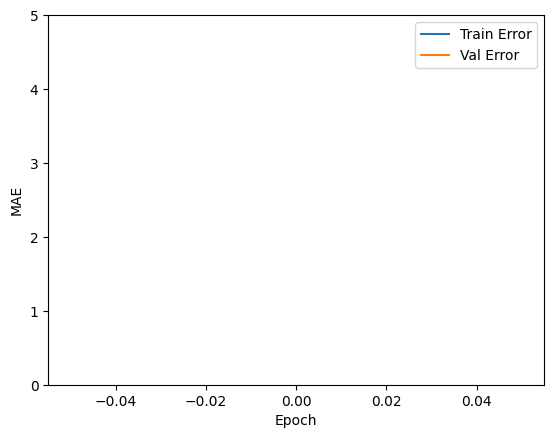

In [123]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.plot(df_hist['epoch'], df_hist['mae'], label=['Train Error'] )
plt.plot(df_hist['epoch'], df_hist['val_mae'], label=['Val Error'] )
plt.ylim([0,5])
plt.legend()

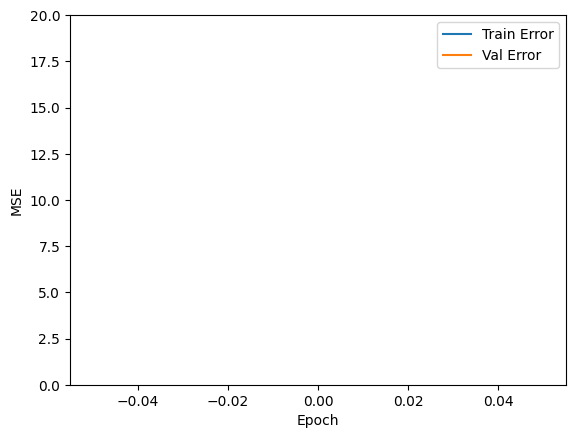

In [124]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(df_hist['epoch'], df_hist['mse'], label=['Train Error'] )
plt.plot(df_hist['epoch'], df_hist['val_mse'], label=['Val Error'] )
plt.ylim([0,20])
plt.legend()

In [125]:
def plot_history(history):
    df_hist = pd.DataFrame(history.history)
    df_hist['epoch'] = history.epoch
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.plot(df_hist['epoch'], df_hist['mae'], label=['Train Error'] )
    plt.plot(df_hist['epoch'], df_hist['val_mae'], label=['Val Error'] )
    plt.legend()
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.plot(df_hist['epoch'], df_hist['mse'], label=['Train Error'] )
    plt.plot(df_hist['epoch'], df_hist['val_mse'], label=['Val Error'] )
    plt.ylim([0,20])
    plt.legend()

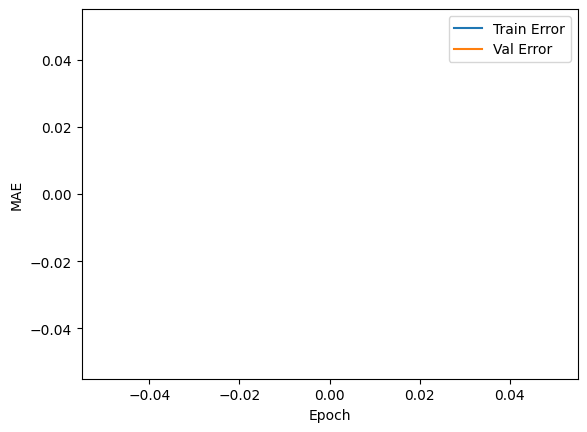

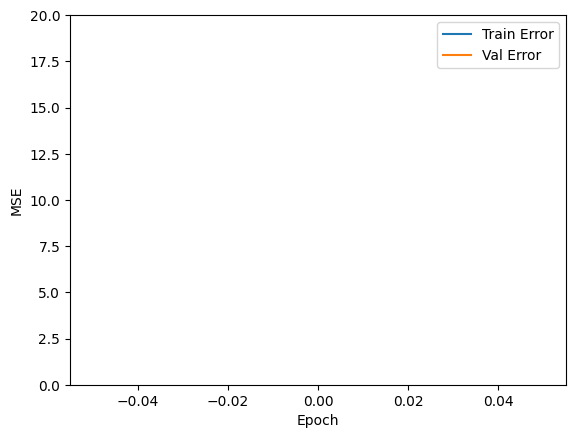

In [126]:
plot_history(history)

¿Alguna conclusión respecto a este gráfico?

Añade un early stopping al modelo. Pon el argumento `callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]` dentro del fit().

Después del entrenamiento utiliza la función del apartado anterior `plot_history(history)`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


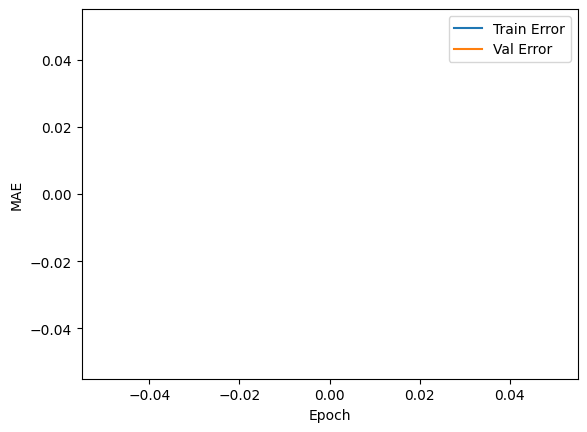

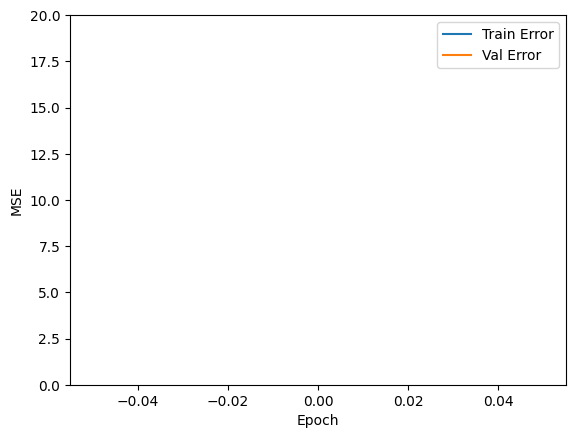

In [127]:
model = keras.Sequential([
    layers.Dense(64, activation = 'relu', input_shape = (normed_train_data.shape[1:])),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile(loss ='mse',
              optimizer = tf.keras.optimizers.RMSprop(0.001),
              metrics = ['mae','mse'])

history = model.fit(
    normed_train_data,
    train_labels,
    epochs = 1000,
    validation_split = 0.2,
    verbose = 0,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]
)

plot_history(history)

Interpreta el gráfico

Veamos qué tan bien generaliza el modelo al usar el conjunto de **test**. Esto nos dice qué tan bien podemos esperar que el modelo prediga cuándo lo usamos en el mundo real. Utiliza el método `evaluate` con los datos de test normalizados y sus labels.

Con el método evaluate devolverá tres valores: loss, mae y mse.

In [128]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels)
mae

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: nan - mae: nan - mse: nan 


nan

In [129]:
model.save("my_keras_model_MAE_1_96.h5")

Ahora prueba el modelo. Coge 10 ejemplos de train y llama a` model.predict`.

In [130]:
result_10 = model.predict(normed_train_data[:10])
result_10

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32)

### Haz Predicciones

Dibuja en un scatter plot las predicciones de test vs sus true labels.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


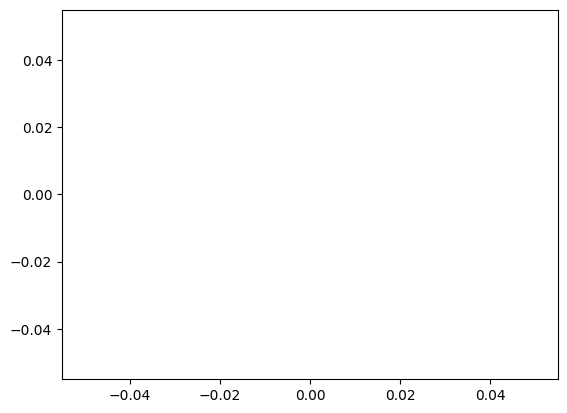

In [131]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)

Parece que nuestro modelo predice razonablemente bien. Echemos un vistazo a la distribución de errores.

Representa los residuos en un histograma

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/axes/_axes.py:7096: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/axes/_axes.py:7097: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

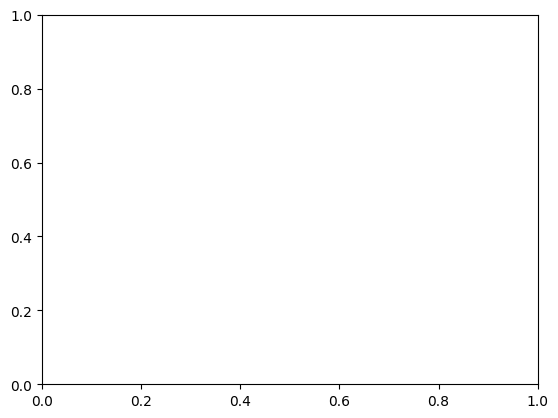

In [132]:
error = test_predictions - test_labels

plt.hist(error)

No es del todo gaussiano, pero podríamos esperar eso porque el número de muestras es muy pequeño.

## Conclusion

Este cuaderno introdujo algunas técnicas para manejar un problema de regresión.

* El error cuadrático medio (MSE) es una función de pérdida común utilizada para problemas de regresión (se utilizan diferentes funciones de pérdida para problemas de clasificación).
* Del mismo modo, las métricas de evaluación utilizadas para la regresión difieren de la clasificación. Una métrica de regresión común es el error absoluto medio (MAE).
* Cuando las características de datos de entrada numéricos tienen valores con diferentes rangos, cada característica debe escalarse independientemente al mismo rango.
* Si no hay muchos datos de entrenamiento, una técnica es preferir una red pequeña con pocas capas ocultas para evitar el sobreajuste.
* La detención temprana es una técnica útil para evitar el sobreajuste.

In [43]:
model_loaded = keras.models.load_model("my_keras_model_MAE_1_96.h5")

test_predictions = model_loaded.predict(normed_test_data).flatten()

3/3 [==============================] - 0s 3ms/step


In [44]:
test_predictions

array([15.959854 , 11.809258 , 11.608888 , 23.739529 , 21.456018 ,
       13.452995 , 13.459328 , 13.185891 , 19.566277 , 30.197691 ,
       25.139772 , 24.434137 , 14.758896 , 27.099537 , 12.689086 ,
       14.1606865, 14.756001 , 13.51071  , 18.882006 , 12.879957 ,
       13.7637005, 26.122679 , 19.916225 , 20.633533 , 29.98501  ,
       24.111109 , 16.20769  , 22.777466 , 17.006292 , 18.20529  ,
       28.178366 , 21.969866 , 18.92736  , 21.148462 , 27.137497 ,
       15.942303 , 19.165396 , 31.352602 , 30.45122  , 17.699923 ,
       31.231674 , 29.20478  , 15.917363 , 36.987144 , 35.3077   ,
       36.589806 , 20.384377 , 22.27115  , 20.109816 , 25.79674  ,
       31.362179 , 18.753128 , 32.70923  , 19.180439 , 18.488049 ,
       18.481604 , 33.337845 , 35.812485 , 22.335962 , 24.958067 ,
       39.508484 , 33.77723  , 27.741447 , 28.67013  , 32.379013 ,
       40.749245 , 37.772156 , 35.85453  , 33.42369  , 31.257288 ,
       23.182585 , 23.119347 , 29.98371  , 30.534584 , 35.9730